In [1]:
import pandas as pd
from typing import Callable, Optional
from utils import (
    convert_to_lst,
    flatten_extend_1d,
    flatten_extend_2d,
    #tag_based_filter_1dsubpillars,
    tag_based_filter_2dsubpillars_matrix,
    tag_based_filter_sectors_2dsubpillars,
    #summarization_evaluation,
    #get_text_embeddings,
    #get_keywords
)

import matplotlib.pyplot as plt

from summarizer4 import SummarizerModel

from reports_generator import ReportsGenerator

/home/rsh/projects/deepl/new_summarizer/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
summarizer_inhouse = ReportsGenerator()

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [3]:
ANALYSIS_FRAMEWORK_ID = 2341
MAX_TOKENS_GENERATION = 64

In [4]:
dataset_file = "datasets/dataset-2023-10-05T10:18:21.127098.csv"

In [5]:
df = pd.read_csv(dataset_file)

In [6]:
df.tail(5)

,project_id,lead_id,entry_id,af,excerpt,original_af_tags,entry_created,geoWidget,scaleWidget,matrix2dWidget,dateRangeWidget,matrix1dWidget,multiselectWidget,organigramWidget
1219,3939,119038,761111,2341,In reaction to a video which revealed the stat...,"{'geoWidget': [60913, 60875], 'scaleWidget': [...",2023-09-22 05:36:13.115160+00:00,"[60913, 60875]",['fairly reliable'],"[['education', 'capacities & response->governm...",['21-09-2023'],NaN,NaN,NaN
1220,3939,119038,761112,2341,It was decided to reduce the number of student...,"{'geoWidget': [60913, 60875], 'scaleWidget': [...",2023-09-22 05:36:13.306770+00:00,"[60913, 60875]",['fairly reliable'],"[['education', 'capacities & response->governm...",['21-09-2023'],NaN,NaN,NaN
1221,3939,119041,761137,2341,With devastated populations scattered in the h...,"{'geoWidget': [60875, 60909], 'scaleWidget': [...",2023-09-22 05:42:12.813664+00:00,"[60875, 60909]",['fairly reliable'],"[['cross', 'capacities & response->government ...",['21-09-2023'],['humanitarian access->physical constraints'],NaN,NaN
1222,3939,119042,761148,2341,During a press conference which followed the G...,"{'geoWidget': [60875, 60909], 'scaleWidget': [...",2023-09-22 05:48:12.188899+00:00,"[60875, 60909]",['fairly reliable'],"[['livelihoods', 'capacities & response->gover...",['21-09-2023'],NaN,NaN,NaN
1223,3939,119042,761149,2341,The Minister Delegate in charge of Relations w...,"{'geoWidget': [60875, 60909], 'scaleWidget': [...",2023-09-22 05:48:12.296583+00:00,"[60875, 60909]",['fairly reliable'],"[['cross', 'capacities & response->government ...",['21-09-2023'],NaN,NaN,NaN


In [7]:
print(f"Total rows in the dataset: {df.shape[0]}")

Total rows in the dataset: 1224


In [8]:
df = df[df["af"] == ANALYSIS_FRAMEWORK_ID]

In [9]:
df.shape

(1224, 14)

In [10]:
pid = df["project_id"][0] # todo: check if all rows contains the same project id

In [11]:
df["matrix1dWidget"] = df["matrix1dWidget"].apply(convert_to_lst)
df["matrix2dWidget"] = df["matrix2dWidget"].apply(convert_to_lst)
df["scaleWidget"] = df["scaleWidget"].apply(convert_to_lst)

In [12]:
def get_1dsubpillars_unique_lst(dataframe: pd.DataFrame) -> list:
    matrix1d_tags = dataframe["matrix1dWidget"]
    matrix1d_tags.dropna(inplace=True)
    unique_tags = set(flatten_extend_1d(matrix1d_tags.tolist()))
    return list(unique_tags)
    

In [13]:
def get_2dsubpillars_unique_lst(dataframe: pd.DataFrame) -> list:
    matrix2d_tags = dataframe["matrix2dWidget"]
    matrix2d_tags.dropna(inplace=True)
    unique_tags = set(tuple(x) for x in flatten_extend_2d(matrix2d_tags.tolist()))
    return list(unique_tags)

In [14]:
def get_scalewidget_unique_lst(dataframe: pd.DataFrame) -> list:
    scalewidget_tags = dataframe["scaleWidget"]
    scalewidget_tags.dropna(inplace=True)
    unique_tags = set(flatten_extend_1d(scalewidget_tags.tolist()))
    return list(unique_tags)

In [15]:
matrix1dsubpillars_lst = get_1dsubpillars_unique_lst(df)
matrix1dsubpillars_lst

['information->information challenges',
 'casualties->dead',
 'shock /event/ongoing conditions->type and characteristics',
 'context->economy',
 'humanitarian profile->affected groups',
 'flag->overview',
 'humanitarian profile->population movement',
 'context->legal  & policy',
 'flag->key event',
 'shock and events->type and characteristics',
 'context->environment',
 'flag->hazard & threats',
 'information->information needs & gaps',
 'context->politics',
 'event/shock->shock/driver',
 'humanitarian access->relief to beneficiaries',
 'humanitarian access->beneficiaries to relief',
 'context->demography',
 'humanitarian profile->casualties',
 'humanitarian access->physical constraints',
 'humanitarian profile->push/pull factors',
 'casualties->injured',
 'humanitarian access->humanitarian access gaps',
 'event/shock->underlying factors/pre-existing vulnerabilities',
 'information->communication means & channels',
 'flag->stakeholders']

In [16]:
matrix2dsubpillars_lst = get_2dsubpillars_unique_lst(df)
matrix2dsubpillars_lst

[('shelter', 'humanitarian conditions->coping mechanisms'),
 ('protection', 'humanitarian conditions->physical & mental wellbeing'),
 ('logistics', 'humanitarian conditions->living standards'),
 ('shelter', 'humanitarian conditions->living standards'),
 ('education', 'capacities & response->system functionality'),
 ('education', 'capacities & response->government and local authorities'),
 ('wash', 'capacities & response->international actors'),
 ('agriculture', 'scope & scale->system disruption'),
 ('wash', 'scope & scale->damages & losses'),
 ('health', 'humanitarian conditions->humanitarian conditions'),
 ('livelihoods', 'capacities & response->system functionality'),
 ('livelihoods', 'capacities & response->rcrc movement'),
 ('livelihoods', 'capacities & response->government and local authorities'),
 ('cross', 'humanitarian conditions->humanitarian conditions'),
 ('logistics', 'capacities & response->system functionality'),
 ('wash', 'humanitarian conditions->living standards'),
 ('

In [17]:
sectors_lst = list({tag[0] for tag in matrix2dsubpillars_lst}) # tag[0] contains sector
print(sectors_lst)

['protection', 'shelter', 'education', 'food', 'livelihoods', 'health', 'cross', 'logistics', 'nutrition', 'agriculture', 'wash']


In [18]:
def calc_freq_df(subpillars_lst: list, key: str, filter_func: Callable) -> pd.DataFrame:
    tag_freq = []
    for tag in subpillars_lst:
        tag_bool_set = [
            filter_func(x, tag) for x in df[key].tolist()
        ]
        tag_freq.append(sum(tag_bool_set))
    return pd.DataFrame({"tags": subpillars_lst, "frequency": tag_freq})

In [19]:
def plot_frequency(tags_df: pd.DataFrame, title: Optional[str]=None, figsize: tuple=(5,5), x: str="tags", y: str="frequency"):
    tags_df.plot.bar(x=x, y=y, rot=0, grid=True, title=title, figsize=figsize)
    plt.xticks(rotation=90, fontsize=8)
    plt.show()

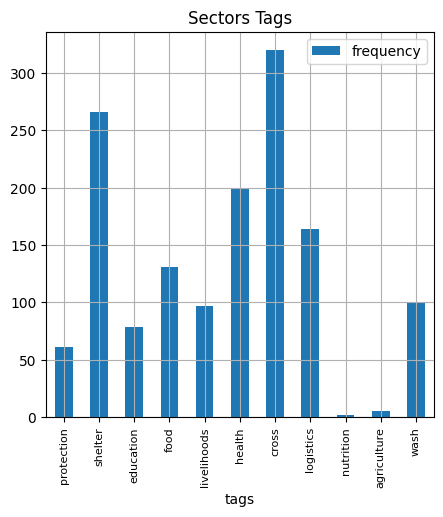

In [20]:
sectors_freq = calc_freq_df(sectors_lst, "matrix2dWidget", tag_based_filter_sectors_2dsubpillars)
plot_frequency(sectors_freq, title="Sectors Tags", figsize=(5,5))

In [21]:
tagname_sectors = sectors_freq.loc[sectors_freq["frequency"].idxmax()]["tags"]
tagname_sectors

'cross'

In [22]:
model = "model1"

In [23]:
def generate_summary_per_category_df(
    tagnames: str,
    filter_func: Callable,
    key_type: str,
    type: str,
    summarizer_model: str,
    project_id: int
) -> pd.DataFrame:
    input_excerpts = []
    summaries_llm = []
    summaries_inhouse = []
    tag_names = []
    for tagname in tagnames: #if tagname:
        print(tagname)
        tag_1d_subpillars_bool = [
            filter_func(x, tagname) for x in df[key_type].tolist()
        ]
        filtered_df = df[pd.Series(tag_1d_subpillars_bool)]
        
        excerpt_texts = "\n".join(filtered_df["excerpt"].tolist()[:25])
        
        excerpt_ids = ", ".join([str(eid) for eid in filtered_df["entry_id"].tolist()[:25]])
        lead_ids = ", ".join([str(lid) for lid in filtered_df["lead_id"].tolist()[:25]])
        
        text_summarizer = SummarizerModel(texts=excerpt_texts)  # fix this
        
        summary_llm = text_summarizer.summarizer()
        summary_inhouse = summarizer_inhouse(excerpt_texts, deployed_endpoint_name="main-model-cpu")
        
        input_excerpts.append(excerpt_texts)
        summaries_llm.append(summary_llm['text'])
        summaries_inhouse.append(summary_inhouse)
        tag_names.append(tagname)

    final_df = pd.DataFrame({
        "input_excerpts": input_excerpts,
        "summaries_llm": summaries_llm,
        "summaries_inhouse": summaries_inhouse,
        "tag_name": tag_names
    })
    final_df["project_id"] = project_id
    final_df["entry_ids"] = excerpt_ids
    final_df["lead_ids"] = lead_ids
    final_df["tag_type"] = type
    return final_df

In [24]:
f_df = generate_summary_per_category_df(
    tagnames=sectors_lst, #tagname_sectors,
    filter_func=tag_based_filter_sectors_2dsubpillars,
    key_type="matrix2dWidget",
    type="Sectors",
    summarizer_model=model,
    project_id=pid
)

protection


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


shelter
education
food
livelihoods
health
cross
logistics
nutrition
agriculture
wash


Your min_length=16 must be inferior than your max_length=12.


In [27]:
f_df.to_csv("outputs/summaries1.csv", index=False)

In [28]:
f_df.columns

Index(['input_excerpts', 'summaries_llm', 'summaries_inhouse', 'tag_name',
       'project_id', 'entry_ids', 'lead_ids', 'tag_type',
       'summarization_model'],
      dtype='object')